# 데이터 입력

In [ ]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# 전처리
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

# train, test 나누기
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('bank-full.csv', sep =';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# 전처리

## 종속변수 y를 수치형으로 바꿔주기. 
no를 0(정상)으로, yes를 1(이상)로 변환

In [ ]:
df.loc[df['y'] == 'no', 'y'] = 0
df.loc[df['y'] == 'yes', 'y'] = 1
# object 타입을 int64 타입으로 바꿔주기
df['y'] = df['y'].astype('int64')

## unknown값 처리
사실상 Null값과 같다고 판단. 전처리 진행.

### unknown값 확인

In [ ]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
288/45211

0.006370131162770122

In [ ]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [ ]:
1857/45211

0.04107407489327818

In [ ]:
df['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [ ]:
13020/45211

0.28798301298356593

In [ ]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [ ]:
36959/45211

0.8174780473778506

### unknown값 제거

poutcome은 너무 많아 열을 삭제하였음

In [ ]:
df.drop('poutcome', axis=1, inplace = True) # poutcome 변수 삭제

In [ ]:
df.loc[df['job'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,0
216,47,unknown,married,unknown,no,28,no,no,unknown,5,may,338,2,-1,0,0
354,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,0
876,37,unknown,single,unknown,no,414,yes,no,unknown,7,may,131,1,-1,0,0
1072,29,unknown,single,primary,no,50,yes,no,unknown,7,may,50,2,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44714,45,unknown,married,tertiary,no,406,no,no,cellular,7,sep,314,1,-1,0,1
44742,64,unknown,married,unknown,no,2799,no,no,telephone,9,sep,378,4,-1,0,0
44970,28,unknown,single,unknown,no,326,no,no,cellular,11,oct,450,1,231,1,1
45141,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,0


In [ ]:
unknowndr1 = df[df['job'].str.contains('unknown')].index
df.drop(unknowndr1, inplace=True)

In [ ]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [ ]:
df.loc[df['job'] == 'unknown']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y


unknown 없어짐을 확인.

In [ ]:
df.loc[df['education'] == 'unknown'] #1857 -> 1730

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,0
13,58,technician,married,unknown,no,71,yes,no,unknown,5,may,71,1,-1,0,0
16,45,admin.,single,unknown,no,13,yes,no,unknown,5,may,98,1,-1,0,0
42,60,blue-collar,married,unknown,no,104,yes,no,unknown,5,may,22,1,-1,0,0
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45098,44,technician,single,unknown,no,11115,no,no,cellular,25,oct,189,1,185,4,0
45109,78,management,married,unknown,no,1780,yes,no,cellular,25,oct,211,2,185,7,1
45129,46,technician,married,unknown,no,3308,no,no,cellular,27,oct,171,1,91,2,1
45150,65,management,married,unknown,no,2352,no,no,cellular,8,nov,354,3,188,13,0


In [ ]:
unknowndr2 = df[df['education'].str.contains('unknown')].index
df.drop(unknowndr2, inplace=True)

In [ ]:
df.loc[df['contact'] == 'unknown'] #13020 -> 12286

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,0
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,self-employed,single,secondary,no,1031,no,no,unknown,20,oct,7,1,-1,0,0
45062,58,retired,married,primary,no,742,no,no,unknown,20,oct,5,1,-1,0,0
45122,40,entrepreneur,single,tertiary,no,262,yes,yes,unknown,26,oct,17,1,-1,0,0
45135,53,blue-collar,married,primary,no,1294,no,no,unknown,28,oct,71,1,-1,0,0


In [ ]:
unknowndr3 = df[df['contact'].str.contains('unknown')].index
df.drop(unknowndr3, inplace=True)

In [ ]:
df # 45211 -> 30907

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,0
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,0
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,0
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,0
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [ ]:
df.reset_index(drop=True, inplace = True) #인덱스 재 정렬
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,0
1,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,0
2,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,0
3,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,0
4,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,1
30903,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,1
30904,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,1
30905,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,0


In [ ]:
# y 변수 저장
df_labels = df['y']

## 인코딩

### 범주형

#### Binary Encoding

In [ ]:
!pip install category_encoders
import category_encoders as ce

df_bi_cat = df[['month', 'job']]
df1 = ce.BinaryEncoder(cols = ['month']).fit_transform(df_bi_cat)
df2 = ce.BinaryEncoder(cols = ['job']).fit_transform(df1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 662 kB/s 


In [ ]:
df1

,month_0,month_1,month_2,month_3,job
0,0,0,0,1,management
1,0,0,0,1,blue-collar
2,0,0,0,1,blue-collar
3,0,0,0,1,technician
4,0,0,0,1,technician
...,...,...,...,...,...
30902,0,1,0,0,technician
30903,0,1,0,0,retired
30904,0,1,0,0,retired
30905,0,1,0,0,blue-collar


In [ ]:
df2

,month_0,month_1,month_2,month_3,job_0,job_1,job_2,job_3
0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,1,0
2,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,1,1
4,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...
30902,0,1,0,0,0,0,1,1
30903,0,1,0,0,1,0,0,1
30904,0,1,0,0,1,0,0,1
30905,0,1,0,0,0,0,1,0


#### One Hot Encoding

In [ ]:
df_one_cat = df[['marital', 'education', 'default','housing',
       'loan', 'contact']] # month와 job을 제외한 범주형 변수 원핫인코딩

In [ ]:
cat_pipeline = Pipeline([
    ('1hot_encoder', OneHotEncoder(sparse=False)),
    ])
df_cat_tr = cat_pipeline.fit_transform(df_one_cat)

## Scaling

### 수치형

#### Robust Scaling

In [ ]:
df_std_big_num = df[['balance', 'duration', 'pdays']] # 표준편차가 큰 수치형 변수

In [ ]:
num_pipeline = Pipeline([
        ('rb_scaler', RobustScaler()),
    ])

df_num_tr = num_pipeline.fit_transform(df_std_big_num)

In [ ]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_std_big_num) #키들(컬럼명)만 list로 반환
cat_attribs = list(df_one_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])


In [ ]:
full_df = pd.DataFrame(full_pipeline.fit_transform(df))

In [ ]:
df_oth = df[['age', 'day', 'campaign', 'previous']] # 나머지 수치형 변수들

In [ ]:
X = pd.concat([full_df,df2,df_oth], axis =1)
X

,0,1,2,3,4,5,6,7,8,9,...,month_2,month_3,job_0,job_1,job_2,job_3,age,day,campaign,previous
0,-0.307909,0.339450,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,0,1,27,4,1,0
1,-0.004921,0.532110,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,1,0,54,4,1,0
2,-0.258699,2.233945,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,0,43,4,2,0
3,-0.319156,-0.532110,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,1,31,4,2,0
4,-0.243937,1.169725,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,1,27,4,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.247452,3.651376,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,1,51,17,3,0
30903,0.882953,1.261468,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,1,71,17,2,0
30904,3.685062,4.339450,16.818182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,1,0,0,1,72,17,5,3
30905,0.137083,1.500000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,0,1,0,57,17,4,0


In [ ]:
data = pd.concat([full_df,df2,df_oth, df_labels], axis =1)
data

,0,1,2,3,4,5,6,7,8,9,...,month_3,job_0,job_1,job_2,job_3,age,day,campaign,previous,y
0,-0.307909,0.339450,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,0,1,27,4,1,0,0
1,-0.004921,0.532110,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,0,1,0,54,4,1,0,0
2,-0.258699,2.233945,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1,0,0,1,0,43,4,2,0,0
3,-0.319156,-0.532110,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,1,1,31,4,2,0,0
4,-0.243937,1.169725,0.000000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1,0,0,1,1,27,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.247452,3.651376,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,1,51,17,3,0,1
30903,0.882953,1.261468,0.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,1,71,17,2,0,1
30904,3.685062,4.339450,16.818182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,1,72,17,5,3,1
30905,0.137083,1.500000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,0,0,1,0,57,17,4,0,0


## Train, Test 나누기

In [ ]:
df_labels.value_counts()

0    26394
1     4513
Name: y, dtype: int64

In [ ]:
# 전체 중 0(정상)의 비율
26394 /(26394+4513) * 100

85.39812987349144

In [ ]:
4513 / (26394+4513) * 100

14.60187012650856

85 대 15

In [ ]:
normal = data.loc[data['y'] == 0]
anomaly = data.loc[data['y'] == 1]

In [ ]:
# normal 의 X, y 나누기
X_normal = normal[normal.columns.difference(['y'])]
y_normal = normal["y"]
X_normal.shape

(26394, 29)

In [ ]:
# anomaly 의 X, y 나누기
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]
X_anomaly.shape

(4513, 29)

In [ ]:
# 정상 85% 중 테스트 시킬 데이터 개수를 이상 데이터 개수와 맞추기
# 85:26394 = 85 * (x/100) :4513
(4513*88) / (85*26394/100)

17.70206241168893

In [ ]:
X_train, X_normal_test, y_train, y_normal_test = train_test_split(X_normal, y_normal, test_size = 0.17, random_state=3)

In [ ]:
X_train.shape

(21907, 29)

In [ ]:
X_normal_test.shape

(4487, 29)

In [ ]:
# 전체 중 학습 데이터의 비율
21907/30907 * 100

70.88038308473809

In [ ]:
# 전체 중 테스트(정상) 데이터의 비율
4487/30907 * 100

14.517746788753358

전체 중 테스트(이상) 데이터의 비율과 거의 비슷합니다. (14.60187012650856)

In [ ]:
X_test = pd.concat([X_normal_test, X_anomaly])
y_test = pd.concat([y_normal_test, y_anomaly])

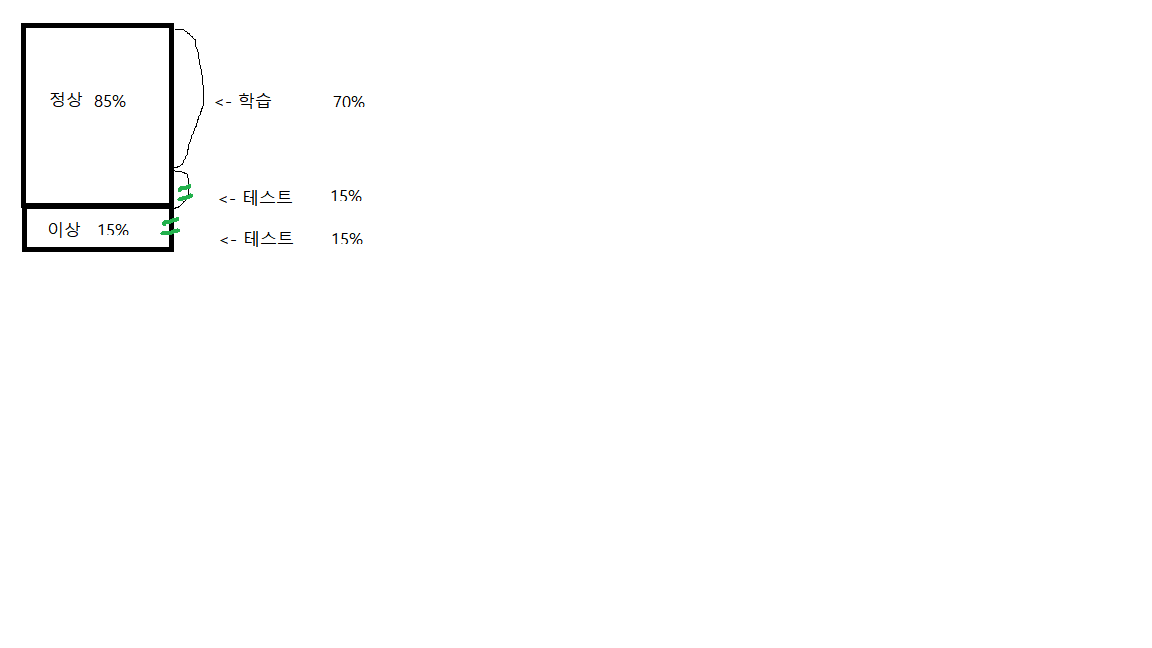

## CorrMat확인
변수 간 선형 상관성을 확인하였음.

In [ ]:
from scipy.io import loadmat
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


import itertools
from sklearn.metrics import silhouette_score
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import seaborn as sns
sns.set_style('white')

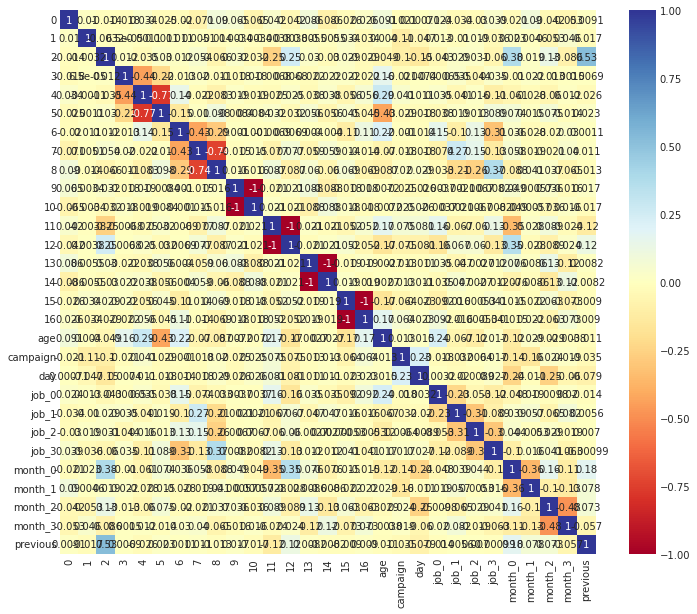

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(X_train.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

# GDE 적용

In [ ]:
# gaussian 분포를 이용해 Outlier를 검출 모델
gde = EllipticEnvelope()
# 모델 fit
gde.fit(X_train)

EllipticEnvelope()

In [ ]:
# train data에 대한 예측 값(정상 = 1, 이상 = -1)
GDE_train_pred = gde.predict(X_train) 
GDE_train_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# test data에 대한 예측 값(정상=1, 이상=-1)
GDE_test_pred = gde.predict(X_test) 
GDE_test_pred = pd.DataFrame(GDE_test_pred)
GDE_test_pred = GDE_test_pred.replace({-1: 1, 1: 0})
GDE_test_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
8995,1
8996,0
8997,0
8998,0


In [ ]:
# Confusion matrix 출력 및 모델 성능 평가
con_mat = confusion_matrix(y_test, GDE_test_pred)
con_mat

array([[4056,  431],
       [3623,  890]])

Text(0.5, 18.5, 'Predicted')

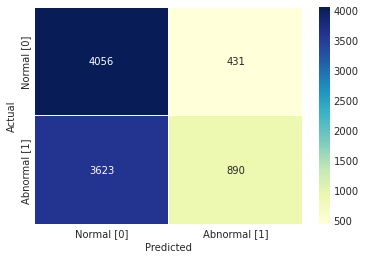

In [ ]:
sns.heatmap(pd.DataFrame(con_mat, columns = ['Predicted', 'Actual']),
            xticklabels=['Normal [0]', 'Abnormal [1]'], 
            yticklabels=['Normal [0]', 'Abnormal [1]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu") 
#annot=True 은 각각의 셀에 값 표기
#fmt="d" 은 셀 데이터 타입이 정수형이므로(소수 두번째 자리까지 나타내고 싶으면 .2f)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
# FRR, FAR, F1 score 도출
def calculate_metric(y_true, y_pred):
    con_mat = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn, fp, tn = con_mat.ravel()
    
    frr = fp / (fp + tn) # 정상인 걸 얼마나 틀렸나 #FPR 같은
    far = fn / (fn + tp) # 비정상인 걸 얼마나 틀렸는 지 # FNR 같은
    
    f1 = f1_score(y_true, y_pred)
    
    return frr, far, f1

In [ ]:
frr, far, f1 = calculate_metric(y_test, GDE_test_pred)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.0961  |  FAR: 0.8028  |  F1 Score: 0.3051


인공지능응용_실습 GDE에서의 F1 보다는 성능 좋다....